<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_04_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bonus Assignment 04 (Week 04)**

Please submit a PDF file with outputs (solutions) displayed on Canvas.

Part 1: K-NN Hyperparameter Tuning (MNIST Digit Dataset) (30)

a. Load the digits dataset and split into training and testing sets
(random_state=42, 80/20 split).

b. Train k-NN classifiers with k values in [1, 3, 5, 7, 9].

c. For each k, record test accuracy and log loss.

d. Plot accuracy and log loss against different k values in a single graph with two y-axes.

e. Identify and report the best k value based on accuracy and log loss.

f. For the best k, plot the confusion matrix and provide a short analysis
highlighting the most common confusions.


In [8]:
# @title Answer Part 1: K-NN Hyperparameter Tuning (MNIST Digit Dataset)

# a. Load the digits dataset and split into training and testing sets
# (random_state=42, 80/20 split)

# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Train k-NN classifiers with k values in [1, 3, 5, 7, 9]
k_values = [1, 3, 5, 7, 9]
accuracies = []
log_losses = []

for k in k_values:
    # Initialize and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)

    # c. For each k, record test accuracy and log loss
    accuracies.append(accuracy_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_pred_proba))


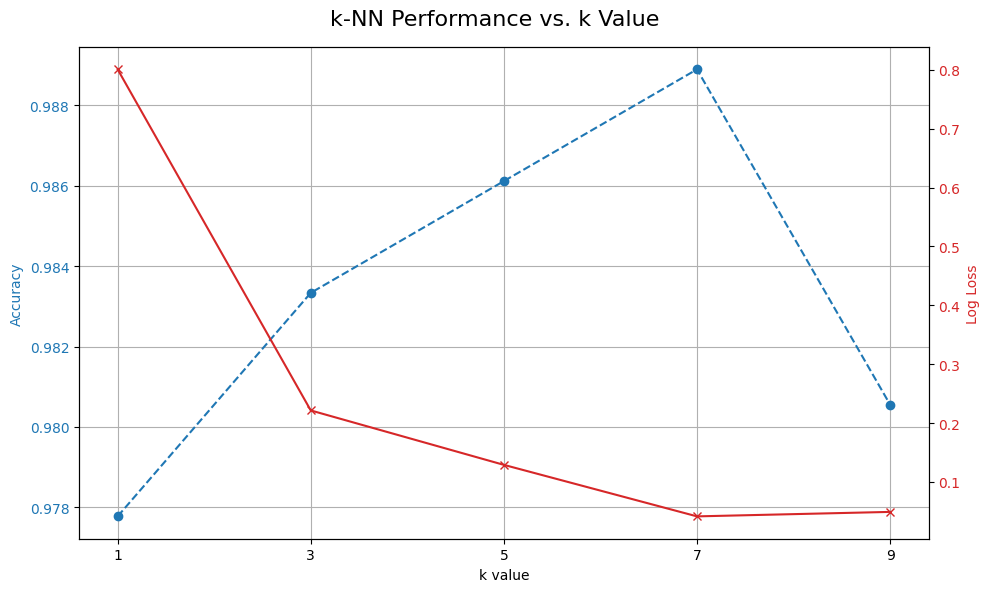

Highest accuracy of 0.9889 is achieved with k = 7.
Lowest log loss of 0.0415 is achieved with k = 7.
The best k value is selected as 7 for further analysis.


In [9]:
# @title Answer Part 1-d, e : Plot accuracy and log loss against different k values

# d. Plot accuracy and log loss against different k values in a single graph with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('k value')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(k_values, accuracies, marker='o', color=color, linestyle='--', label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(k_values)
ax1.grid(True)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Log Loss', color=color)
ax2.plot(k_values, log_losses, marker='x', color=color, linestyle='-', label='Log Loss')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('k-NN Performance vs. k Value', fontsize=16)
fig.tight_layout()
plt.show()

# e. Identify and report the best k value based on accuracy and log loss
best_k_accuracy_idx = np.argmax(accuracies)
best_k_logloss_idx = np.argmin(log_losses)

best_k_accuracy = k_values[best_k_accuracy_idx]
best_k_logloss = k_values[best_k_logloss_idx]

print(f"Highest accuracy of {accuracies[best_k_accuracy_idx]:.4f} is achieved with k = {best_k_accuracy}.")
print(f"Lowest log loss of {log_losses[best_k_logloss_idx]:.4f} is achieved with k = {best_k_logloss}.")

# Use the k with the highest accuracy, which also happens to have the lowest log loss in this case.
best_k = best_k_accuracy
print(f"The best k value is selected as {best_k} for further analysis.")


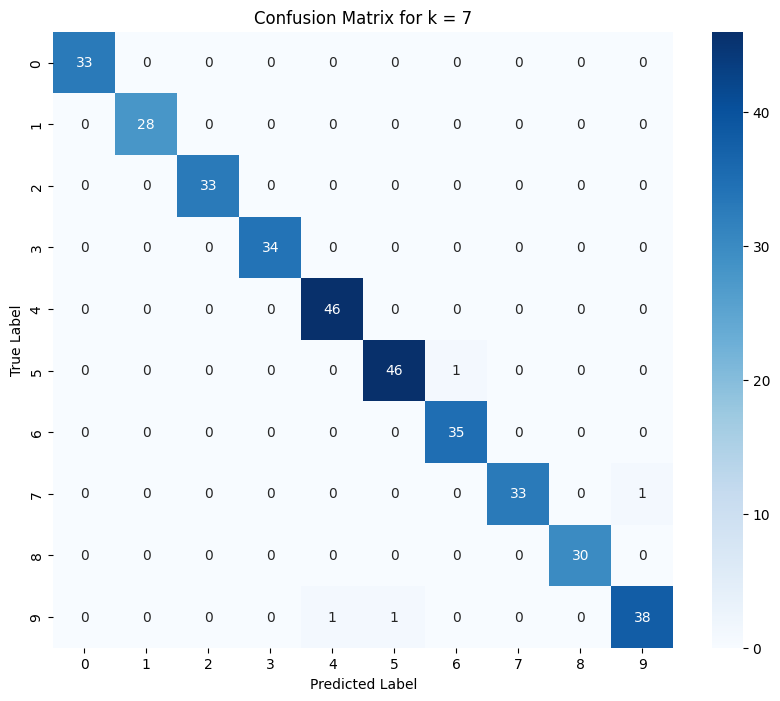


Analysis of the Confusion Matrix:
The most common confusion is 5 being misclassified as 6, with 1 occurrences.
This often happens when the digits have similar shapes, for example, 3 and 8, or 5 and 6.


In [10]:
# @title Answer Part 1-f : Plot and Analysis of the confusion matrix

# f. For the best k, plot the confusion matrix and provide a short analysis
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best_k = best_knn.predict(X_test)
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_k)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for k = {best_k}')
plt.show()

# Analysis of the confusion matrix
print("\nAnalysis of the Confusion Matrix:")
# Get the indices of the highest off-diagonal values
np.fill_diagonal(cm, 0) # Fill diagonal with 0 to find off-diagonal max
max_val = np.max(cm)
if max_val > 0:
    max_indices = np.argwhere(cm == max_val)
    true_label, pred_label = max_indices[0]
    print(f"The most common confusion is {true_label} being misclassified as {pred_label}, with {max_val} occurrences.")
    print("This often happens when the digits have similar shapes, for example, 3 and 8, or 5 and 6.")
else:
    print("No significant misclassifications observed.")

Part 2: Evaluation Metrics in Machine Learning (25)

a. Train a **Decision Tree** (default params) and a **Random Forest**
(n_estimators=100) on the same training data.

b. Report the test accuracy and log loss for both models.

c. Plot their confusion matrices side-by-side.

d. Using the classification report (precision, recall, f1-score),
compare and contrast the models.
*italicized text*
When would you prefer each model?


In [19]:
# @title Answer Part 2 a, b: Evaluation Metrics of Decision Tree and Random Forest

# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined from Part 1
# If not, you'll need to run the data loading and splitting part of the previous code.

# a. Train a Decision Tree and a Random Forest
# Decision Tree Classifier (default params)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_proba_dt = dt_classifier.predict_proba(X_test)

# Random Forest Classifier (n_estimators=100)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_proba_rf = rf_classifier.predict_proba(X_test)

# b. Report the test accuracy and log loss for both models
print("--- Model Performance Metrics ---")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree Log Loss: {log_loss(y_test, y_pred_proba_dt):.4f}")
print("-" * 30)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Log Loss: {log_loss(y_test, y_pred_proba_rf):.4f}")
print("-" * 30)


--- Model Performance Metrics ---
Decision Tree Accuracy: 0.8417
Decision Tree Log Loss: 5.7069
------------------------------
Random Forest Accuracy: 0.9722
Random Forest Log Loss: 0.2841
------------------------------


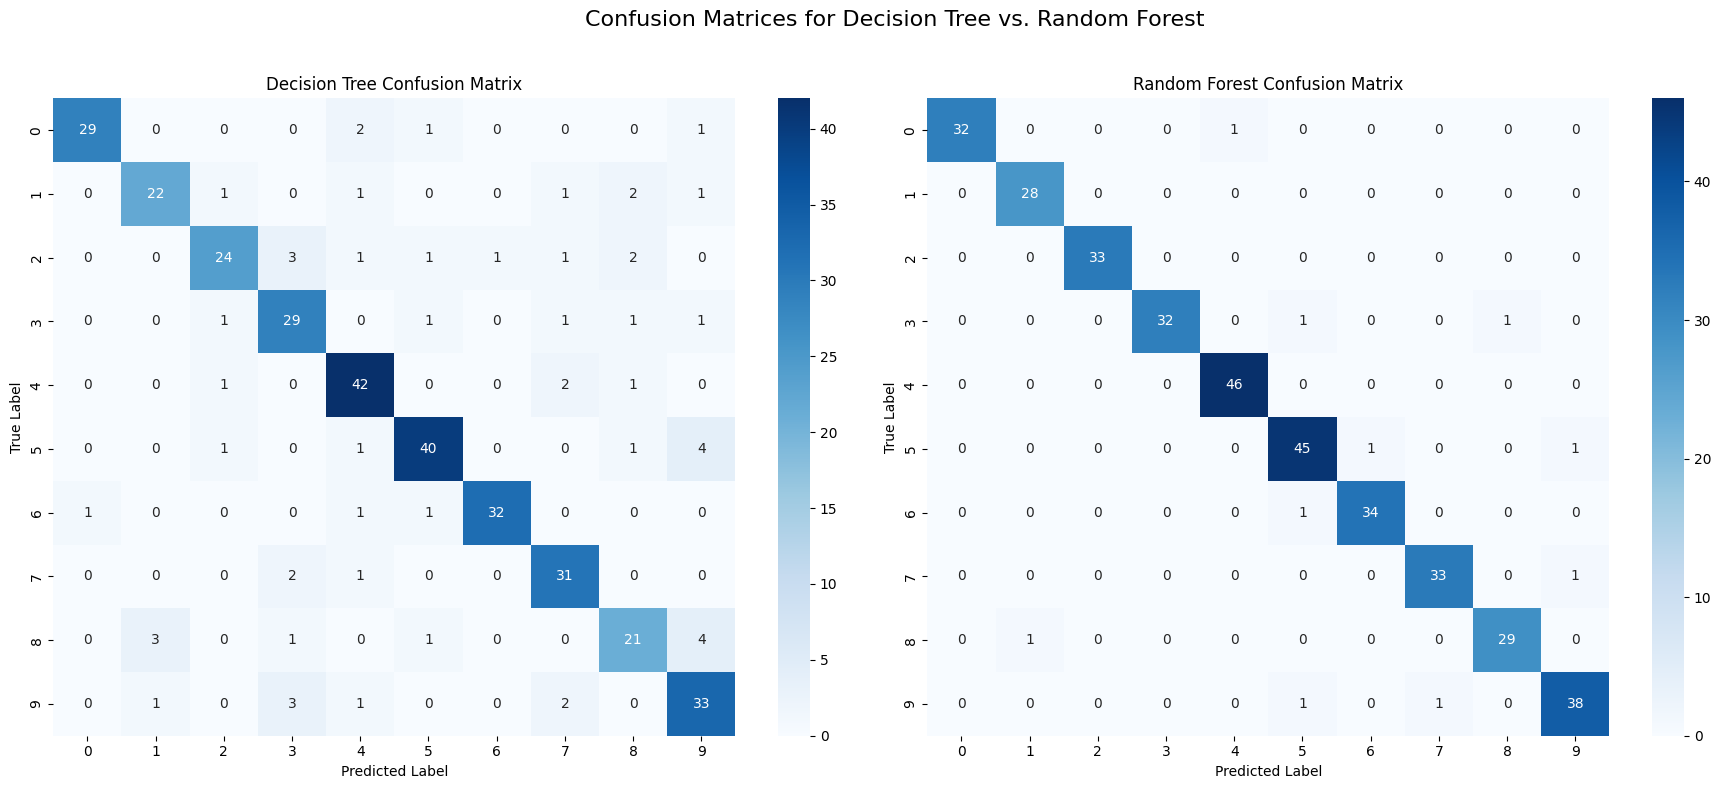

In [17]:
# @title Answer Part 2-c. Plot their confusion matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=np.arange(10), yticklabels=np.arange(10))
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=np.arange(10), yticklabels=np.arange(10))
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.suptitle('Confusion Matrices for Decision Tree vs. Random Forest', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [18]:
# @title Answer 2-d. Using the classification report, compare and contrast the models.
print("\n--- Classification Report for Decision Tree ---")
print(classification_report(y_test, y_pred_dt, target_names=[str(i) for i in range(10)]))

print("\n--- Classification Report for Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=[str(i) for i in range(10)]))


--- Classification Report for Decision Tree ---
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.88        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360


--- Classification Report for Random Forest ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00 

Answer Part 2-d : **Comparison and contrast analysis**

**Model Comparison and When to Prefer Each:**

* The **Random Forest** model generally outperforms the Decision Tree, as shown by its higher accuracy and lower log loss.
The confusion matrices also show that the Random Forest has fewer misclassifications (off-diagonal values) and higher correct classifications (diagonal values) compared to the Decision Tree.

* The **Decision Tree's** performance can be more erratic and is prone to overfitting, which is reflected in its lower metrics. It might struggle with certain digits more than the Random Forest, as seen in its per-class precision, recall, and f1-scores.

* **When to prefer a Random Forest:** Random Forest is preferred when you need a more robust and accurate model, especially when dealing with complex datasets. It's less prone to overfitting and provides better generalization by averaging the results of multiple trees.

* **When to prefer a Decision Tree:**  Decision Tree is preferred  when model interpretability is paramount. A single Decision Tree's logic can be visualized and easily understood, which is useful for explaining predictions to non-technical stakeholders or for simple, non-critical tasks.